In [1]:
import pandas as pd
from google.colab import files
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import os
import zipfile
import re, string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

link dataset : https://www.kaggle.com/datasets/tariqsays/sentiment-dataset-with-1-million-tweets

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                          29MB  2023-11-16 01:38:36           2441        223  1.0              
thedevastator/global-video-game-sales-and-ratings           Global Video Game Sales and Ratings             71KB  2023-12-20 06:46:32           1178         27  0.9411765        
muhammadbinimran/housing-price-prediction-data              Housing Price Prediction Data                  763KB  2023-11-21 17:56:32          11142        187  1.0              
henryshan/2023-data-scientists-salary        

In [4]:
!kaggle datasets download -d tariqsays/sentiment-dataset-with-1-million-tweets

sentiment-dataset-with-1-million-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
zipPath = '/content/sentiment-dataset-with-1-million-tweets.zip'
zipFile = zipfile.ZipFile(zipPath, 'r')
zipFile.extractall('/content/Dataset')
zipFile.close()

In [6]:
df = pd.read_csv('/content/Dataset/dataset.csv')

In [7]:
df.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


In [8]:
df_en_only = df[df['Language'] == 'en']

In [9]:
df_en_only

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
5,It sucks for me since I'm focused on the natur...,en,negative
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


In [10]:
df_en_only.Label.value_counts()

positive       248516
negative       244146
uncertainty    198586
litigious      180062
Name: Label, dtype: int64

In [11]:
df_en_only.isna().sum()

Text        0
Language    0
Label       0
dtype: int64

In [12]:
random_samples = {}
labels = ['positive', 'negative', 'uncertainty', 'litigious']
sample_size = 1000

for label in labels:
    label_data = df_en_only[df_en_only['Label'] == label]
    random_sample = label_data.sample(n=sample_size, random_state=42)
    random_samples[label] = random_sample

result_df = pd.concat(random_samples.values(), ignore_index=True)
print(result_df)

                                                   Text Language      Label
0     @MileyMilf I wouldn't dream of it, just don't ...       en   positive
1     @ZeroCashJay @TheFansEdge @EGLaflare @waltkdis...       en   positive
2        @fusionfsgg Would be a dream come true to join       en   positive
3     @FreeSpeechPlzz @WhatGiraffe_ @DFSInfluencer @...       en   positive
4     people asking “where is sapnap” dude he’s figh...       en   positive
...                                                 ...      ...        ...
3995  @askcomenity Comenity has been having problems...       en  litigious
3996  @dp_satish Install automatic speed detectors a...       en  litigious
3997  Even then, as an unstoppable injustice proceed...       en  litigious
3998  @DeBankDeFi Since it takes months to get a con...       en  litigious
3999  @RealMickFoley @undertaker As God is my witnes...       en  litigious

[4000 rows x 3 columns]


In [13]:
df_shuffled = result_df.sample(frac=1, random_state=42)
df_shuffled = df_shuffled.reset_index(drop = True)

In [14]:
df_shuffled

,Text,Language,Label
0,Rhyne is a pretty good defender. So I’m not su...,en,positive
1,Netflix is Releasing Into the Breach for Andro...,en,litigious
2,@notthequiettype I am so excited to read this ...,en,positive
3,A $4.4 billion lending fraud crime is currentl...,en,litigious
4,"Somewhere in this ad, lies our country's redem...",en,uncertainty
...,...,...,...
3995,@javierayvoce @saegerart @5WatBoss @ThatUmbrel...,en,negative
3996,"@Deadyoung7 I don't know why people do that, w...",en,negative
3997,@LeenaVanD @MmeEmmeline @laureningram You know...,en,positive
3998,and cops could just keep it or give away back ...,en,litigious


In [15]:
category = pd.get_dummies(df_shuffled.Label)
df_baru = pd.concat([df_shuffled.Text, category],axis = 1)

In [16]:
df_baru.head(10)

,Text,litigious,negative,positive,uncertainty
0,Rhyne is a pretty good defender. So I’m not su...,0,0,1,0
1,Netflix is Releasing Into the Breach for Andro...,1,0,0,0
2,@notthequiettype I am so excited to read this ...,0,0,1,0
3,A $4.4 billion lending fraud crime is currentl...,1,0,0,0
4,"Somewhere in this ad, lies our country's redem...",0,0,0,1
5,@_Ed87_ I can dream lmao,0,0,1,0
6,@mikewinmill @DisneyStudios @disneyplus Poor g...,0,1,0,0
7,@SandraHelena39 @Sasha_CA @realchrisrufo I'm j...,0,0,1,0
8,@Rob_Percival_ My observation has been that it...,0,0,1,0
9,"Good night, buddy's. https://t.co/T8S77SHdDV",0,0,1,0


###Deep Cleaning Teks

In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_stop_words(df):
    word_tokens = word_tokenize(df)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return ' '.join(filtered_sentence)

def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def clean_hashtags(text):
    words = re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)
    cleaned_text = " ".join(word.strip() for word in words)
    cleaned_text = " ".join(word.strip() for word in re.split('#|_', cleaned_text))
    return cleaned_text

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

In [19]:
df_clean = df_baru
df_clean['Text'] = df_clean['Text'].apply(strip_all_entities)
df_clean['Text'] = df_clean['Text'].apply(clean_hashtags)
df_clean['Text'] = df_clean['Text'].apply(filter_chars)
df_clean['Text'] = df_clean['Text'].apply(remove_mult_spaces)
df_clean['Text'] = df_clean['Text'].apply(remove_stop_words)

In [20]:
df_clean.head()

,Text,litigious,negative,positive,uncertainty
0,rhyne pretty good defender im sure clark think...,0,0,1,0
1,netflix releasing breach android next month an...,1,0,0,0
2,excited read story need puckbunny matthew life...,0,0,1,0
3,44 billion lending fraud crime currently inves...,1,0,0,0
4,somewhere ad lies countrys redemption even pol...,0,0,0,1


### Ubah Nilai pada DataFrame

In [21]:
text_df = df_clean['Text'].values
label = df_clean[['positive', 'negative', 'uncertainty', 'litigious']].values

In [22]:
X_train, X_val, y_train, y_val = train_test_split(text_df,label, test_size = .2,random_state = 101)

### Tokenisasi Data

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

In [24]:
tokenizer = Tokenizer(num_words= 3000, oov_token='')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_val)

sekuens_latih = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_val)

padded_latih = pad_sequences(
    sekuens_latih,
    maxlen = 200,
    padding='post'
    )
padded_test = pad_sequences(
    sekuens_test,
    maxlen = 200,
    padding='post'
    )

In [25]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai > 92%!")
      self.model.stop_training = True


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=3000,
        output_dim=300,
        input_length = 200,
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [27]:
on_stop = MyCallback()

In [28]:
checkpoint_path = "Sentiment_NLP"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [29]:
auto_reduce_lr = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 3,
    factor = 0.1,
    min_lr = 0.00001
)


In [30]:
history = model.fit(padded_latih, y_train,
                    epochs=100,
                    validation_data=(padded_test, y_val),
                    verbose=2,
                    callbacks = [on_stop,checkpoint_callback,auto_reduce_lr])

Epoch 1/100
100/100 - 34s - loss: 1.9705 - accuracy: 0.2756 - val_loss: 1.4526 - val_accuracy: 0.2188 - lr: 0.0010 - 34s/epoch - 345ms/step
Epoch 2/100
100/100 - 6s - loss: 1.2760 - accuracy: 0.4706 - val_loss: 1.1962 - val_accuracy: 0.3413 - lr: 0.0010 - 6s/epoch - 64ms/step
Epoch 3/100
100/100 - 6s - loss: 0.5025 - accuracy: 0.8325 - val_loss: 0.6718 - val_accuracy: 0.8087 - lr: 0.0010 - 6s/epoch - 57ms/step
Epoch 4/100

Akurasi telah mencapai > 92%!
100/100 - 3s - loss: 0.2739 - accuracy: 0.9294 - val_loss: 0.3175 - val_accuracy: 0.9225 - lr: 0.0010 - 3s/epoch - 32ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

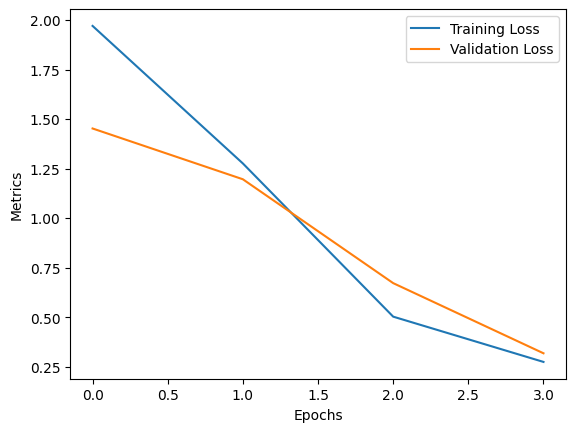

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

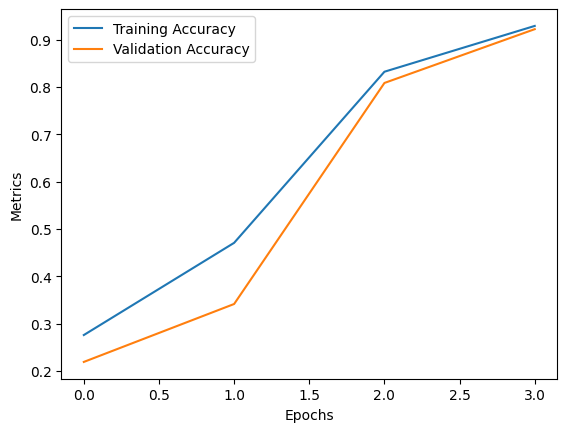

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show